In [64]:
import pandas as pd

dados = pd.read_csv('../data/raw/train.tsv', sep='\t')

dados.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [65]:
print('Quantidade de registros = ', len(dados))
print('Quantidade de registros únicos = ', dados.name.nunique())
print('Porcentagem de registros únicos = ', 100 * dados.name.nunique()/len(dados))

Quantidade de registros =  1482535
Quantidade de registros únicos =  1225273
Porcentagem de registros únicos =  82.64715504187085


In [66]:
print('Números de categorias:', dados.category_name.unique().size)

Números de categorias: 1288


In [67]:
dados.price.describe()

count    1.482535e+06
mean     2.673752e+01
std      3.858607e+01
min      0.000000e+00
25%      1.000000e+01
50%      1.700000e+01
75%      2.900000e+01
max      2.009000e+03
Name: price, dtype: float64

In [68]:
precos_medios = dados.groupby('name')['price'].mean().to_frame()

In [69]:
precos_medios[precos_medios == precos_medios.max()].dropna()

,price
name,
NEW Chanel WOC Caviar Gold Hardware,2009.0


array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

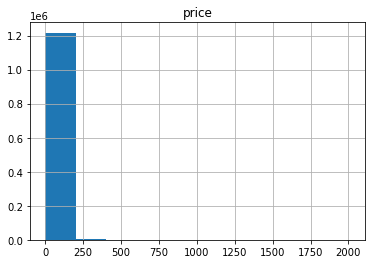

In [70]:
precos_medios.hist()

In [71]:
precos_medios[precos_medios == precos_medios.min()].dropna()

,price
name,
"""Music is not what I do. It's who I am!""",0.0
(12) Ann Taylor Slacks,0.0
(FREE SHIP) Pink Bra,0.0
*NARS ITA Kabuki Brush*,0.0
0G taper and plug,0.0
...,...
white crochet dress,0.0
☆New☆ Clarks - Wide Heel Shoe - Size 10M,0.0
⚡FS l.e.i. tank top⚡,0.0


In [72]:
dados[dados.price == 0].size

6992

In [73]:
dados.price.isna().sum()

0

In [74]:
dados.query('name == "NEW Chanel WOC Caviar Gold Hardware"')

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
760469,760469,NEW Chanel WOC Caviar Gold Hardware,1,Women/Women's Handbags/Shoulder Bag,Chanel,2009.0,0,"New with tag, box and dustbag but no receipt. ..."


In [75]:
dados.name.value_counts(ascending=True).head()

MLB Cincinnati Reds T Shirt Size XL        1
H&M floral Bra 36B                         1
Victoria's Secret tote and sequin pouch    1
Sale Organic teeth whitening               1
OS Cuckoo Clock BNWT Lularoe               1
Name: name, dtype: int64

In [76]:
produtos = ['Bundle', 'Reserved', 'Converse',  'BUNDLE', 'Dress']

dados.query("name == \"Converse\"").brand_name.value_counts()

Converse           282
Converse Shoes      18
Nike                12
Baby connection      1
Keds                 1
Name: brand_name, dtype: int64

In [77]:
dados.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [78]:
colunas = dados.category_name.str.split('/', expand=True)

In [79]:
colunas[3].isnull().sum() / len(colunas)

0.997039530264041

In [80]:
colunas[4].isnull().sum() / len(colunas)

0.9979366423052407

In [81]:
categorias = list(colunas[0].unique())

In [82]:
for k in range(1, 5):
    cate2 = list(colunas[k].unique())
    for i in cate2:
        categorias.append(i)

In [83]:
set_categorias = set(categorias)
len(set_categorias)

952

11860280

In [84]:
dados.query('price == 0').shape

(874, 8)

In [85]:
dados.shape

(1482535, 8)

In [86]:
dados2 = dados.query('price > 0')
dados2.name = dados2.name.str.lower()
dados2.shape

/tmp/ipykernel_4934/2777742087.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados2.name = dados2.name.str.lower()


(1481661, 8)

1225273

In [87]:
dados2.name.nunique()

1138684

In [88]:
precos_medios = dados2.groupby('name')['price'].mean().to_frame()
precos_medios[precos_medios == precos_medios.min()].dropna()

,price
name,
!!!jewelry sale!! 3 days only! [rm].,3.0
!!!jewelry sale!!! 3 days only! [rm],3.0
!!!jewelry sale!!!for 3 days only!!! [rm],3.0
!!!on hold!!! 2t tshirt,3.0
!!free ship!! tumblr stickers (5),3.0
...,...
⭐️ 45 sticker labels ⭐️,3.0
⭐️ my little pony necklace ⭐️,3.0
⭐️black velvet choker⭐️,3.0


In [89]:
colunas

,0,1,2,3,4
0,Men,Tops,T-shirts,None,None
1,Electronics,Computers & Tablets,Components & Parts,None,None
2,Women,Tops & Blouses,Blouse,None,None
3,Home,Home Décor,Home Décor Accents,None,None
4,Women,Jewelry,Necklaces,None,None
...,...,...,...,...,...
1482530,Women,Dresses,Mid-Calf,None,None
1482531,Kids,Girls 2T-5T,Dresses,None,None
1482532,Sports & Outdoors,Exercise,Fitness accessories,None,None
1482533,Home,Home Décor,Home Décor Accents,None,None


In [90]:
dados2.brand_name.isna().sum()/len(dados2)

0.426775085529011

In [91]:
len(dados2.query('item_description == "No description yet"'))/len(dados2)

0.055631483854943875

In [92]:
dados2.shape

(1481661, 8)

In [93]:
dados2.sample(10).name

406281                           holiday pajamas
1151271      mary kay timewise liquid foundation
936714              brown velvet choker freeship
797320                     lps orange great dane
939682       kendra scott inspired oval earrings
184021        brand new led happy birthday crown
405382                       moon child glow kit
239289         nwt rare kendra scott danielle's!
811934     gerber & carter baby girl 6-12 months
1147024        megellan dri fit medium men's top
Name: name, dtype: object

In [94]:
from nltk.tokenize import RegexpTokenizer

def clean_names(name):
    tokenizer = RegexpTokenizer(r'\w+')
    token = tokenizer.tokenize(name)
    name = ''
    
    for n in token:
        if not n.isdigit() and not n == 'rm':
            name += n
            name += ' '

    name = name.strip()
    
    return name

In [95]:
dados2['name'] = [clean_names(name) for name in dados2.name]

dados2.head()

/tmp/ipykernel_4934/1122498657.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados2['name'] = [clean_names(name) for name in dados2.name]


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,mlb cincinnati reds t shirt size xl,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,razer blackwidow chroma keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,ava viv blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,leather horse statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24k gold plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [96]:
precos_medios = dados2.groupby('name')['price'].mean().to_frame()
precos_medios[precos_medios == precos_medios.min()].dropna()

,price
name,
00g silicon plugs,3.0
00g surgical steel tunnels,3.0
00g tapers,3.0
0g plugs nwot,3.0
10k yellow gold w diamonds,3.0
...,...
zte pink glitter case used,3.0
zumiez stickers,3.0
zutano newborn size cotton booties,3.0


In [97]:
dados2.columns

Index(['train_id', 'name', 'item_condition_id', 'category_name', 'brand_name',
       'price', 'shipping', 'item_description'],
      dtype='object')

In [98]:
dados2['category_1'] = colunas[0]
dados2['category_2'] = colunas[1]
dados2['category_3'] = colunas[2]
dados2.drop('category_name', axis=1, inplace=True)
dados2 = dados2[['name', 'category_1', 'category_2',
       'category_3', 'item_condition_id', 'brand_name', 'price',
       'shipping', 'item_description']]
dados2.head()

/tmp/ipykernel_4934/2090309027.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados2['category_1'] = colunas[0]
/tmp/ipykernel_4934/2090309027.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados2['category_2'] = colunas[1]
/tmp/ipykernel_4934/2090309027.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

,name,category_1,category_2,category_3,item_condition_id,brand_name,price,shipping,item_description
0,mlb cincinnati reds t shirt size xl,Men,Tops,T-shirts,3,NaN,10.0,1,No description yet
1,razer blackwidow chroma keyboard,Electronics,Computers & Tablets,Components & Parts,3,Razer,52.0,0,This keyboard is in great condition and works ...
2,ava viv blouse,Women,Tops & Blouses,Blouse,1,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,leather horse statues,Home,Home Décor,Home Décor Accents,1,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,24k gold plated rose,Women,Jewelry,Necklaces,1,NaN,44.0,0,Complete with certificate of authenticity


In [99]:
dados2.to_csv('train_data_prep01.csv', index=False)

In [100]:
dados2.sample(20).name

165190             origami owl rose gold locket set
1007530                        bundle lace up heels
431071                      guardians of the galaxy
361529                     long sleeve hooded shirt
516657                                 original psp
1301117            bundle for amanda lululemon nike
364255                               cpb sun screen
227227                                    dr heater
768226                                     yeti cup
1214285       polo by ralph lauren men s shirt sz l
785777         red ferragamo belt with color buckle
309579                          bionicle heroes wii
209782                 iphone plus t mobile network
1381672                        baby ktan wrap sling
16822               touch liquid foundation organza
867960                   fable ii iii complete xbox
892668                         vs pink bedding twin
550305     victoria s secret pink ultimate leggings
684876                              woman s dresses
808229      